In [17]:
import os
import cv2
import glob
import h5py
from scipy.io import loadmat
import numpy as np
from tqdm import tqdm
from utils_gen import gen_density_map_gaussian
import matplotlib.pyplot as plt
%matplotlib inline


#root = 'data/ShanghaiTech/'
root = (r'C:\Users\oriol\ShanghaiTec')
'''
part_A_train = os.path.join(root, 'part_A/train_data', 'images')
part_A_test = os.path.join(root, 'part_A/test_data', 'images')
part_B_train = os.path.join(root, 'part_B/train_data', 'images')
part_B_test = os.path.join(root, 'part_B/test_data', 'images')
'''
part_A_train = os.path.join(root, 'part_A_final\\train_data', 'images')
part_A_test = os.path.join(root, 'part_A_final\\test_data', 'images')
part_B_train = os.path.join(root,'part_B_final\\train_data', 'images')
part_B_test = os.path.join(root, 'part_B_final\\test_data', 'images')

path_sets_A = [part_A_train, part_A_test]
path_sets_B = [part_B_train, part_B_test]
img_paths_A = []
for path in path_sets_A:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths_A.append(img_path)
print(len(img_paths_A))
img_paths_B = []
for path in path_sets_B:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths_B.append(img_path)
print(len(img_paths_B))

482
716


In [2]:
#img_paths_A = img_paths_A[1:100]

In [18]:
for dataset in ['A','B']:
    img_paths = eval('img_paths_'+dataset)
    for img_path in tqdm(img_paths):
        if img_path == r"C:\Users\oriol\ShanghaiTec\part_A_final\test_data\images\IMG_29.jpg":
                aaa=1
        img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground_truth').replace('IMG_', 'GT_IMG_'))
        img = cv2.imread(img_path)
        sigma = 4  if 'part_A' in img_path else 15
        k = np.zeros((img.shape[0], img.shape[1]))
        gt = pts["image_info"][0, 0][0, 0][0]
        for i in range(len(gt)):
            if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
                if int(gt[i][1]) < 0.0 or int(gt[i][0]) < 0.0: #Eliminamos puntos negativos que dan error con valor absoluto
                    gt[i][0] = abs(gt[i][0])
                    gt[i][1] = abs(gt[i][1])
                k[int(gt[i][1]), int(gt[i][0])] = 1

        DM = gen_density_map_gaussian(k, gt, sigma=sigma)
        #print(img_path)
        file_path = img_path.replace('.jpg', '.h5').replace('images', 'ground_truth')
        with h5py.File(file_path, 'w') as hf:
            hf['density'] = DM

100%|██████████| 716/716 [00:28<00:00, 24.78it/s]


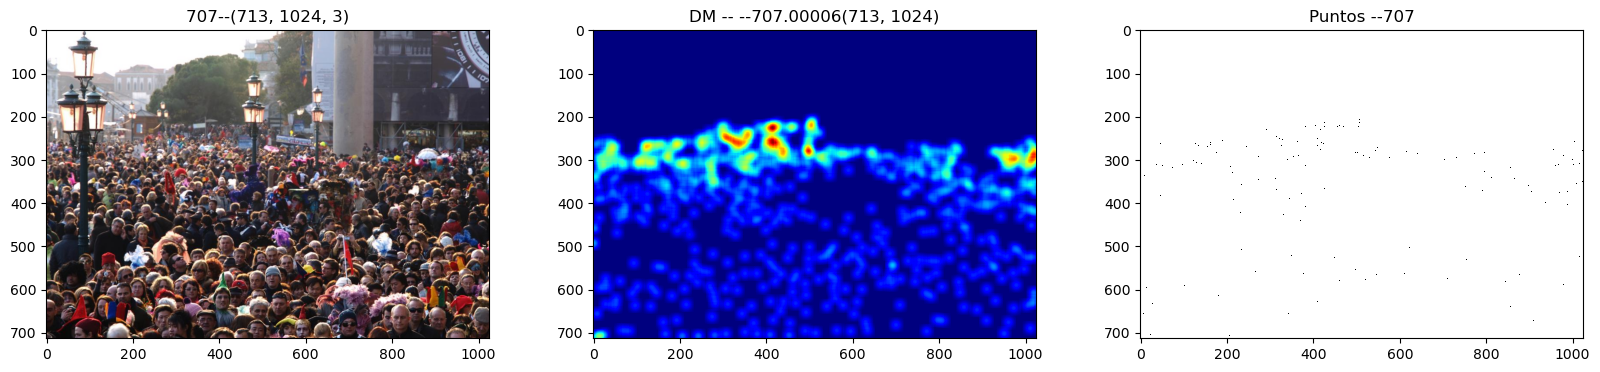

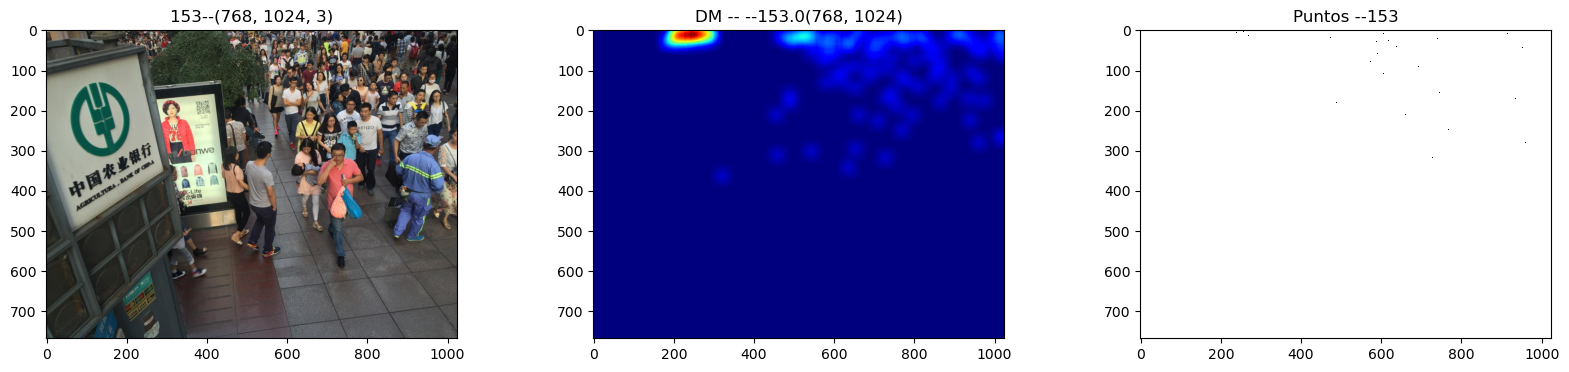

In [19]:
# Show a sample
img_paths = [r'C:\Users\oriol\ShanghaiTec\part_A_final\train_data\images/IMG_2.jpg',
             r'C:\Users\oriol\ShanghaiTec\part_B_final\train_data\images/IMG_2.jpg']
for img_path in img_paths:
    img_ori = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    pts = loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground_truth').replace('IMG_', 'GT_IMG_'))
    img = cv2.imread(img_path)
    
    sigma = 4  if 'part_A' in img_path else 15
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = pts["image_info"][0, 0][0, 0][0]
    for i in range(len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            if int(gt[i][1]) >= 0.0 or int(gt[i][0]) >= 0.0: #Eliminamos puntos negativos que dan error con valor absoluto
                gt[i][0] = abs(gt[i][0])
                gt[i][1] = abs(gt[i][1])
            k[int(gt[i][1]), int(gt[i][0])] = 1
            img_ori[int(gt[i][1]), int(gt[i][0]),0] = 0
            img_ori[int(gt[i][1]), int(gt[i][0]),1] = 0
            img_ori[int(gt[i][1]), int(gt[i][0]),2] = 0
    DM = gen_density_map_gaussian(k, gt, sigma=sigma)
    fg, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 4))
    ax0.imshow(img_ori)
    ax0.set_title(str(gt.shape[0])+'--'+str(img_ori.shape))
    ax1.imshow(np.squeeze(DM), cmap=plt.cm.jet)
    ax1.set_title('DM -- '+'--'+str(np.sum(DM))+str(DM.shape))
    #ax2.imshow(np.squeeze(k), cmap=plt.cm.jet)
    ax2.imshow(np.squeeze(k),cmap='Greys',  interpolation='nearest')
    ax2.set_title('Puntos '+'--'+str(len(gt)))
    plt.show()